# NetworkX

## Breve introducción a las funciones de la librería: [Github Redes Complejas 1](https://github.com/Daniel-A-GS/Redes-Complejas-26-1/blob/main/S04/S4_IntroNewtX.ipynb)

## Obtención de Datos

## ¿Cómo los desarrolladores las combinan en sus perfiles profesionales en Stack Overflow? Base de datos de [kaggle](https://www.kaggle.com/datasets/stackoverflow/stack-overflow-tag-network/data)

In [ ]:
!pip install kaggle --quiet
import os, json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import scipy.stats as stats
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with open("/content/drive/MyDrive/MatApl/26-1 Ayudantias/Redes Complejas/Clases/kaggle_key.json", "r") as f:
    cred = json.load(f)

#Variables de entorno
os.environ["KAGGLE_USERNAME"] = cred["username"]
os.environ["KAGGLE_KEY"] = cred["key"]

In [ ]:
!kaggle datasets download -d stackoverflow/stack-overflow-tag-network -p /content --unzip

Dataset URL: https://www.kaggle.com/datasets/stackoverflow/stack-overflow-tag-network
License(s): CC-BY-SA-3.0
  0% 0.00/6.72k [00:00<?, ?B/s]
100% 6.72k/6.72k [00:00<00:00, 20.8MB/s]


In [ ]:
os.listdir('/content')

['.config',
 'drive',
 'citation-network-dataset.zip',
 'dblp.v12.json',
 'stack_network_nodes.csv',
 'stack_network_links.csv',
 'sample_data']

In [ ]:
stack_overflow_nodes = pd.read_csv('/content/stack_network_nodes.csv')
stack_overflow_edges = pd.read_csv('/content/stack_network_links.csv')

In [ ]:
G = nx.from_pandas_edgelist(stack_overflow_edges, source='source', target='target', edge_attr='value', create_using=nx.Graph())

# Add node attributes
for index, row in stack_overflow_nodes.iterrows():
    node_name = row['name']
    if node_name in G:
        G.nodes[node_name]['group'] = row['group']
        G.nodes[node_name]['nodesize'] = row['nodesize']

print(f"Number of nodes in the graph: {G.number_of_nodes()}")
print(f"Number of edges in the graph: {G.number_of_edges()}")

Number of nodes in the graph: 115
Number of edges in the graph: 245


In [ ]:
stack_overflow_nodes

,name,group,nodesize
0,html,6,272.45
1,css,6,341.17
2,hibernate,8,29.83
3,spring,8,52.84
4,ruby,3,70.14
...,...,...,...
110,perl,13,19.38
111,cloud,9,10.66
112,photoshop,6,12.62
113,powershell,5,9.85


El valor de los enlaces indica que tan seguido dos tecnologías aparecen en un perfil relativo a cuantas veces aparecen por separado. Qué tan más probable es que dos tecnologías aparezcan juntas comparado con si fueran independientes.

In [ ]:
stack_overflow_edges

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925
...,...,...,...
485,objective-c,xcode,43.418825
486,swift,xcode,48.620335
487,iphone,xcode,34.712865
488,ios,xcode,46.365091


## Visualizaciones

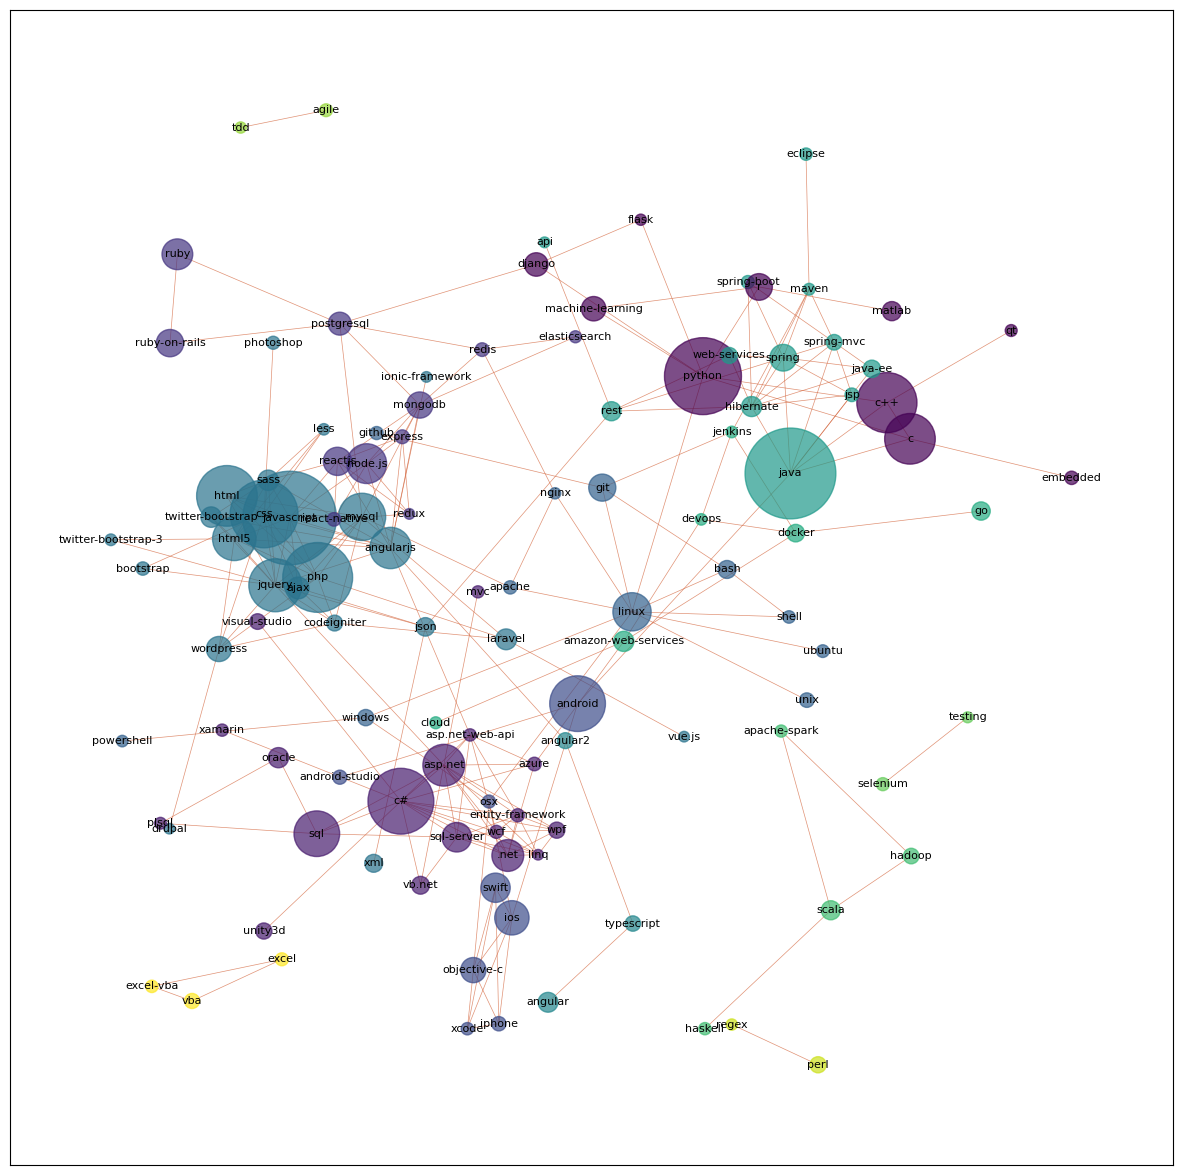

In [ ]:
plt.figure(figsize=(15, 15))

pos = nx.spring_layout(G, k=0.15, iterations=20)

node_size = [G.nodes[node]['nodesize'] * 7 for node in G.nodes()]
node_color = [G.nodes[node]['group'] for node in G.nodes()]

node_collection = nx.draw_networkx_nodes(
    G,
    pos=pos,
    node_size=node_size,
    node_color=node_color,
    cmap=plt.cm.viridis,
    alpha=0.7
)

nx.draw_networkx_edges(
    G,
    pos=pos,
    width=0.5,
    alpha=0.7,
    edge_color='#d3643b'
)

nx.draw_networkx_labels(
    G,
    pos=pos,
    font_size=8
)
plt.show()

In [ ]:
G = nx.Graph()

#Nodos con atributos
for _, row in stack_overflow_nodes.iterrows():
    G.add_node(
        row["name"],
        group=row["group"], #Atributo #1
        nodesize=row["nodesize"] #Atributo #2
    )

#Enlaces con peso del dataframe
for _, row in stack_overflow_edges.iterrows():
    G.add_edge(
        row["source"],
        row["target"],
        weight=int(round(row["value"]))
    )

print("Nodos:", G.number_of_nodes())
print("Edges:", G.number_of_edges())

Nodos: 115
Edges: 245


## Métricas

In [ ]:
#Centralidades
degree_centrality = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G, weight="weight")
eigenvector = nx.eigenvector_centrality(G, weight="weight", max_iter=1000)
katz = nx.katz_centrality_numpy(G, alpha=0.005, beta=1.0, weight="weight")
clustering = nx.clustering(G.to_undirected(), weight="weight")

def sort_dict_desc(d):
    return dict(sorted(d.items(), key=lambda x: x[1], reverse=True))

degree_centrality_sorted = sort_dict_desc(degree_centrality)
betweenness_sorted = sort_dict_desc(betweenness)
eigenvector_sorted = sort_dict_desc(eigenvector)
katz_sorted = sort_dict_desc(katz)
clustering_sorted = sort_dict_desc(clustering)


def print_top(metric_name, metric_dict, top_n=10):
    print(f"\n Top {top_n} - {metric_name}")
    for i, (node, value) in enumerate(list(metric_dict.items())[:top_n], 1):
        print(f"{i}. {node}: {value:.6f}")


print_top("Degree Centrality", degree_centrality_sorted)
print_top("Betweenness Centrality", betweenness_sorted)
print_top("Eigenvector Centrality", eigenvector_sorted)
print_top("Katz Centrality", katz_sorted)
print_top("Clustering Coefficient", clustering_sorted)



 Top 10 - Degree Centrality
1. jquery: 0.140351
2. css: 0.122807
3. c#: 0.122807
4. asp.net: 0.114035
5. angularjs: 0.114035
6. javascript: 0.105263
7. mysql: 0.096491
8. html5: 0.087719
9. php: 0.087719
10. linux: 0.087719

 Top 10 - Betweenness Centrality
1. linux: 0.249832
2. mysql: 0.190524
3. angularjs: 0.179216
4. jquery: 0.174999
5. apache: 0.135797
6. python: 0.118123
7. json: 0.114915
8. rest: 0.104358
9. asp.net: 0.102494
10. asp.net-web-api: 0.099415

 Top 10 - Eigenvector Centrality
1. css: 0.465122
2. jquery: 0.373359
3. javascript: 0.369889
4. html: 0.331170
5. php: 0.307173
6. html5: 0.286371
7. mysql: 0.195877
8. sass: 0.186542
9. angularjs: 0.169349
10. ajax: 0.157798

 Top 10 - Katz Centrality
1. node.js: 0.476127
2. reactjs: 0.451209
3. express: 0.364417
4. mongodb: 0.345427
5. angularjs: 0.283785
6. redux: 0.273193
7. react-native: 0.229429
8. redis: 0.077613
9. javascript: 0.069053
10. postgresql: 0.052095

 Top 10 - Clustering Coefficient
1. swift: 0.448830
2. sp

### Asortatividad

Si r > 0

Los nodos tienden a conectarse con otros del mismo grupo.
→ Ecosistemas cerrados.

Si r ≈ 0

No hay patrón estructural claro.

Si r < 0

Los nodos tienden a conectarse con nodos de grupos distintos.

In [ ]:
#Asortatividad por grupo (¿los nodos tienden a conectarse con otros del mismo grupo?)
assortativity = nx.attribute_assortativity_coefficient(G, "group")

print("Asortatividad por grupo:", assortativity)

Asortatividad por grupo: 0.8770734448536422


Los puentes indican herramientas que se utilizan en dos o más roles, por ejemplo, python para backend y python para data analysis.

In [ ]:
bridges = list(nx.bridges(G.to_undirected()))

count = {}

for i, j in bridges:
    if i in count:
        count[i] += 1
    else:
        count[i] = 1

    if j in count:
        count[j] += 1
    else:
        count[j] = 1

count_sorted = dict(sorted(count.items(), key=lambda x: x[1], reverse=True))
count_sorted

{'c#': 3,
 'angularjs': 2,
 'angular2': 2,
 'linux': 2,
 'typescript': 2,
 'css': 1,
 'photoshop': 1,
 'c': 1,
 'embedded': 1,
 'c++': 1,
 'qt': 1,
 'asp.net': 1,
 'mvc': 1,
 'xamarin': 1,
 'unity3d': 1,
 'visual-studio': 1,
 'github': 1,
 'git': 1,
 'android': 1,
 'android-studio': 1,
 'scala': 1,
 'haskell': 1,
 'ionic-framework': 1,
 'laravel': 1,
 'vue.js': 1,
 'json': 1,
 'xml': 1,
 'wordpress': 1,
 'drupal': 1,
 'maven': 1,
 'eclipse': 1,
 'unix': 1,
 'ubuntu': 1,
 'angular': 1,
 'tdd': 1,
 'agile': 1,
 'rest': 1,
 'api': 1,
 'testing': 1,
 'selenium': 1,
 'docker': 1,
 'go': 1,
 'amazon-web-services': 1,
 'cloud': 1,
 'windows': 1,
 'powershell': 1,
 'r': 1,
 'matlab': 1,
 'regex': 1,
 'perl': 1}

## Distribución de grados

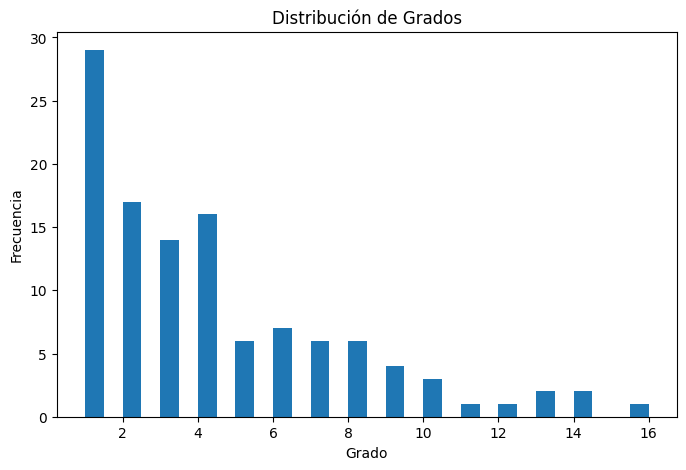

In [ ]:
degrees = [deg for node, deg in G.degree()]

plt.figure(figsize=(8,5))
plt.hist(degrees, bins=30)
plt.title("Distribución de Grados")
plt.xlabel("Grado")
plt.ylabel("Frecuencia")
plt.show()

## Visualización Red principal

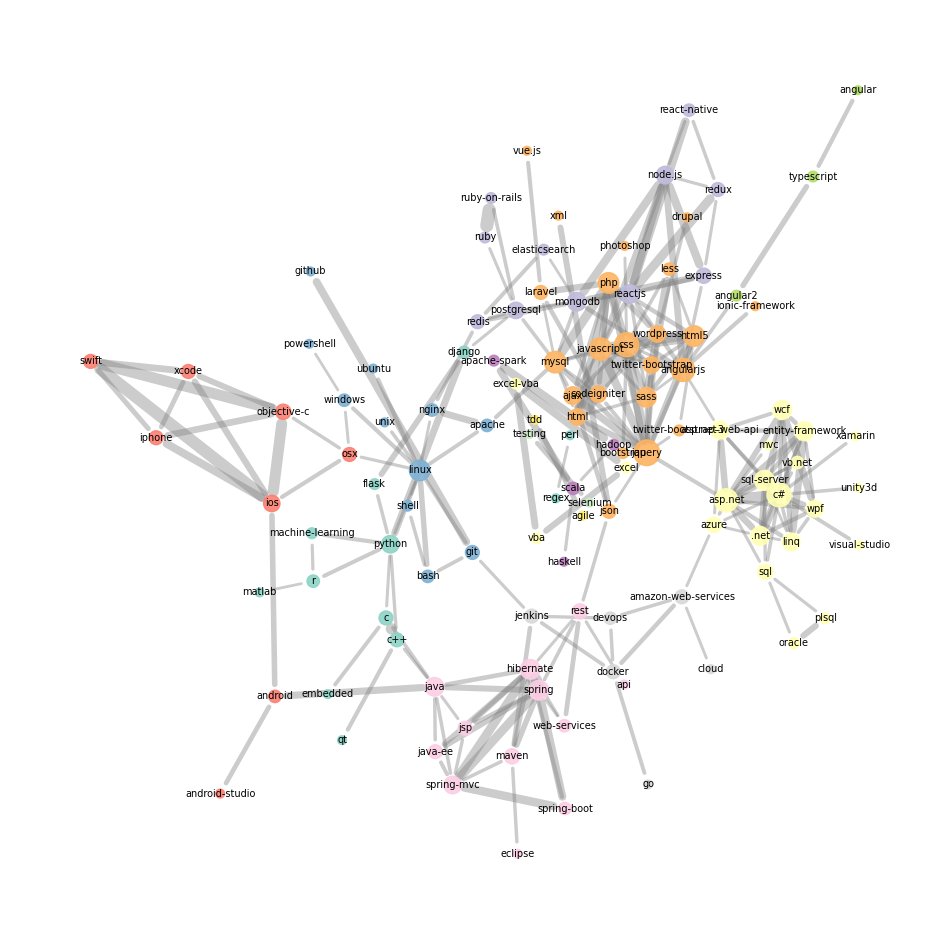

In [ ]:
plt.figure(figsize=(12,12))

pos = nx.kamada_kawai_layout(G)

# Colores por grupo
groups = nx.get_node_attributes(G, "group")
unique_groups = list(set(groups.values()))
cmap = plt.get_cmap("Set3")
color_map = {g: cmap(i % cmap.N) for i, g in enumerate(unique_groups)}
node_colors = [color_map[groups[n]] for n in G.nodes()]

# Grosor aristas proporcional al peso
weights = [G[u][v]["weight"] for u,v in G.edges()]
edge_widths = [w * 0.1 for w in weights]

nx.draw_networkx_nodes(
    G,
    pos,
    node_color=node_colors,
    alpha=0.9
)

nx.draw_networkx_edges(
    G, pos,
    width=edge_widths,
    alpha=0.4,
    edge_color="gray",
    arrows=True
)

nx.draw_networkx_labels(
    G, pos,
    font_size=7, # Adjusted font size for readability
    font_color='black'
)

plt.axis("off")
plt.show()

## Vistas o Subgrafos

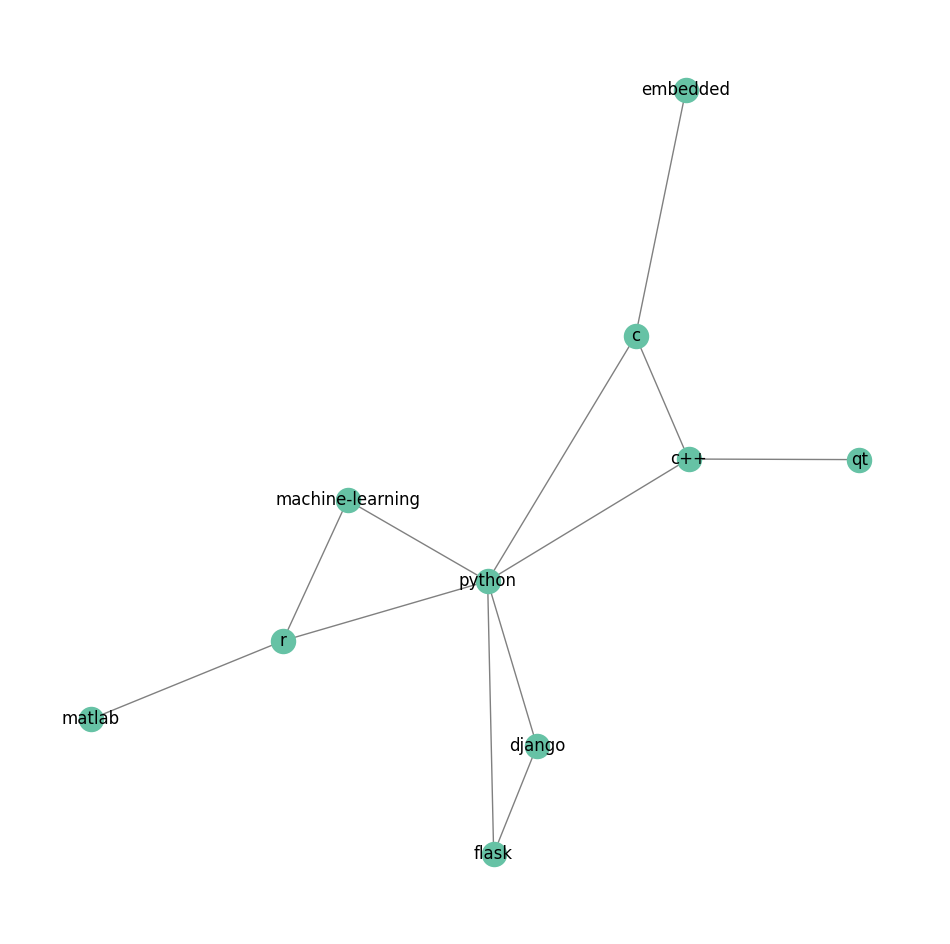

In [ ]:
from networkx.classes.graphviews import subgraph_view

def filter_nodes(n):
    return G.nodes[n]["group"] == 1

G_sub = subgraph_view(G, filter_node=filter_nodes)

plt.figure(figsize=(12, 12))
pos_sub = nx.spring_layout(G_sub, seed=42)

nx.draw_networkx(
    G_sub,
    pos=pos_sub,
    node_color="#66c2a5",
    node_size=300,
    edge_color="gray",
    arrows=True
)

plt.axis("off")
plt.show()

# [Graphviz](https://www.graphviz.org/documentation/)

Reading package lists...
Building dependency tree...
Reading state information...
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  libatk1.0-0 libatk1.0-data libgail-common libgail18 libgtk2.0-0
  libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk librsvg2-common
  libxcomposite1 libxdot4
Suggested packages:
  gvfs
The following packages will be REMOVED:
  pkgconf r-base-dev
The following NEW packages will be installed:
  libatk1.0-0 libatk1.0-data libgail-common libgail18 libgraphviz-dev
  libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxcomposite1 libxdot4 pkg-config
0 upgraded, 13 newly installed, 2 to remove and 2 not upgraded.
Need to get 2,544 kB of archives.
After this operation, 7,959 kB of additional disk space will be us

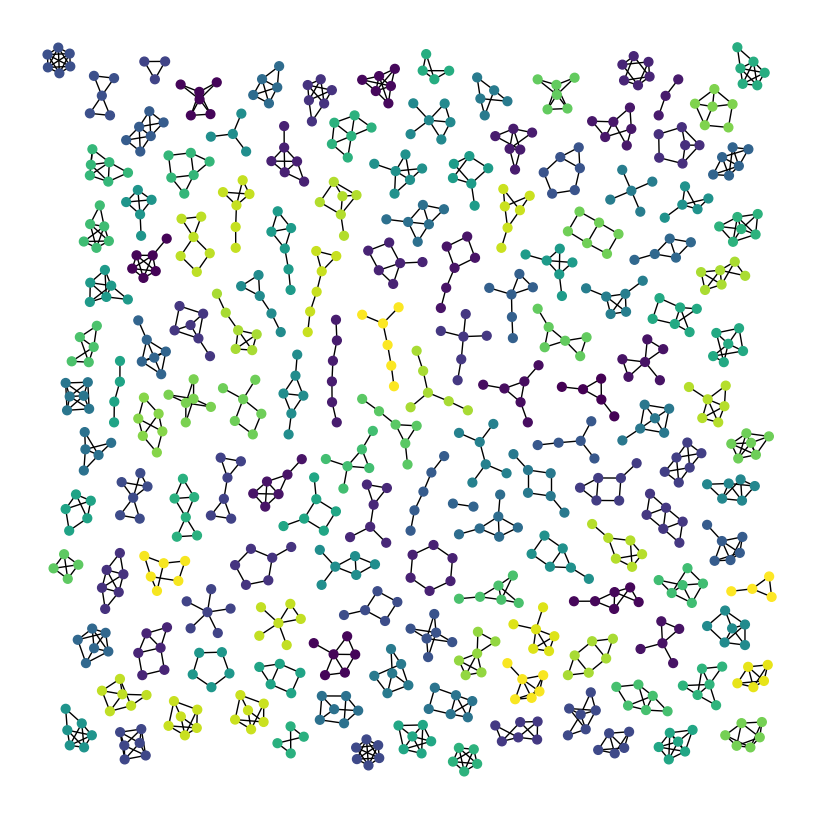

In [ ]:
!apt-get install -y graphviz libgraphviz-dev pkg-config --quiet
!pip install pygraphviz --quiet

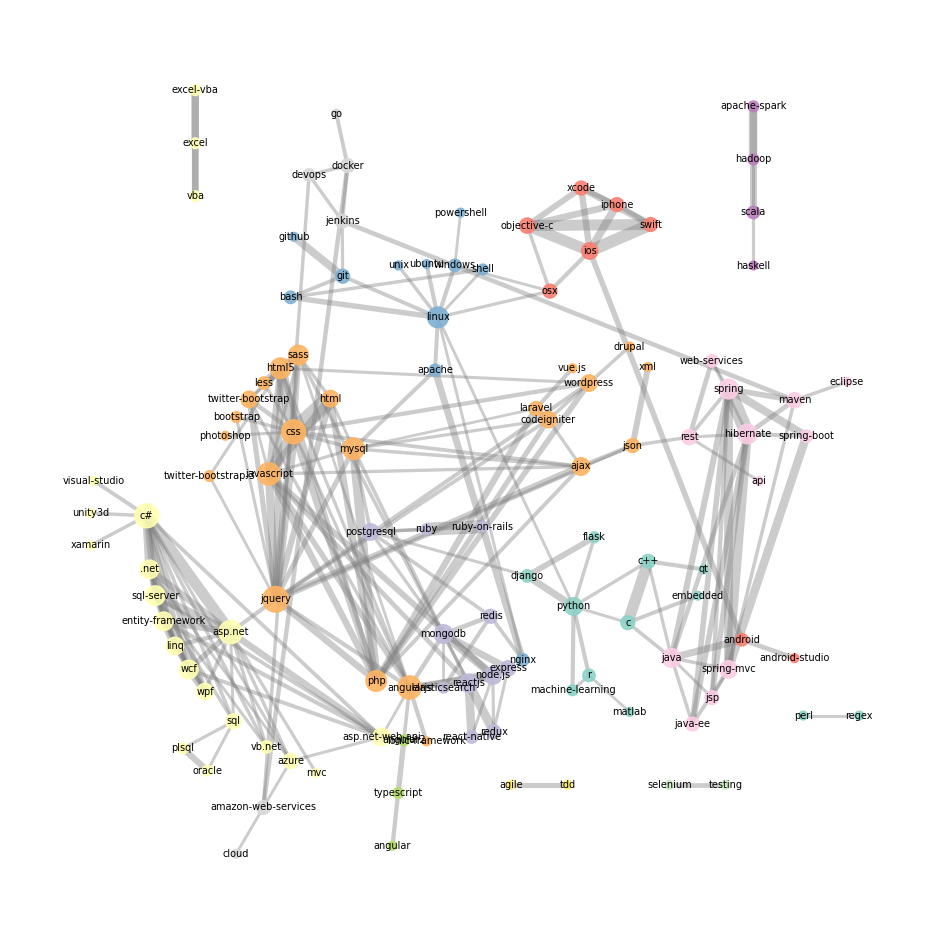

In [ ]:
plt.figure(figsize=(12,12))

# ‘dot’, ‘twopi’, ‘fdp’, ‘sfdp’, ‘circo’
pos = nx.nx_agraph.graphviz_layout(G, prog='twopi')

node_sizes = [deg * 20 + 20 for _, deg in G.degree()]

groups = nx.get_node_attributes(G, "group")
unique_groups = list(set(groups.values()))
cmap = plt.get_cmap("Set3")
color_map = {g: cmap(i % cmap.N) for i, g in enumerate(unique_groups)}
node_colors = [color_map[groups[n]] for n in G.nodes()]

weights = [G[u][v]["weight"] for u,v in G.edges()]
edge_widths = [w * 0.1 for w in weights]

nx.draw_networkx_nodes(
    G, pos,
    node_size=node_sizes,
    node_color=node_colors,
    alpha=0.9
)

nx.draw_networkx_edges(
    G, pos,
    width=edge_widths,
    alpha=0.4,
    edge_color="gray"
)

nx.draw_networkx_labels(
    G, pos,
    font_size=7,
    font_color='black'
)

plt.axis("off")
plt.show()

# [Redes Geoespaciales](https://networkx.org/documentation/stable/auto_examples/geospatial/plot_osmnx.htm)

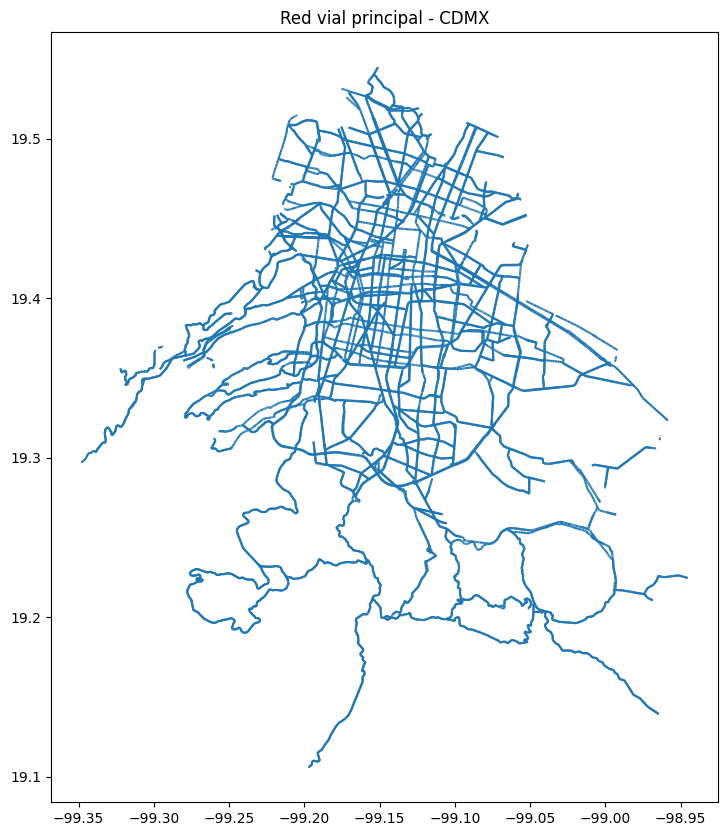

In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt

place = "Ciudad de México, Mexico"

G = ox.graph_from_place(
    place,
    network_type="drive",
    simplify=True
)

_, edges_gdf = ox.graph_to_gdfs(G, nodes=True)

major = edges_gdf[edges_gdf["highway"].isin([
    "primary", "secondary", "trunk"
])]

major.plot(figsize=(10,10))
plt.title("Red vial principal - CDMX")
plt.show()

In [ ]:
print("Nodos:", len(G.edges()))
print("Enlaces:", len(G.nodes()))

Nodos: 295129
Enlaces: 125556


In [ ]:
edges_gdf

osmid      highway lanes maxspeed  \
u           v          key                                          
30339493    274185917  0    226529202        trunk     4       80   
30339495    274187776  0    226529202        trunk     4       80   
            274188569  0    683249554  residential     1      NaN   
30339671    275512749  0    396108080  residential     4      NaN   
            274840978  0    569407579  residential     4      NaN   
...                               ...          ...   ...      ...   
13525100044 3029576020 0    650396758  residential   NaN      NaN   
            1932474505 0    650396758  residential   NaN      NaN   
13545177637 280165378  0     25697371  residential   NaN      NaN   
            667189999  0     25697371  residential   NaN      NaN   
            280165907  0    867818353  residential   NaN      NaN   

                                                name  oneway       ref  \
u           v          key                                               
30339493    274185917  0    Calzada San Antonio Abad    True  RADIAL 3   
30339495    274187776  0    Calzada San Antonio Abad    True  RADIAL 3   
            274188569  0        Calle Juan A. Mateos    True       NaN   
30339671    275512749  0         Calle Matías Romero   False       NaN   
            274840978  0         Calle Matías Romero   False       NaN   
...                                              ...     ...       ...   
13525100044 3029576020 0             Calle Osa Mayor   False       NaN   
            1932474505 0             Calle Osa Mayor   False       NaN   
13545177637 280165378  0    Calle Reyna Ixtlixóchitl   False       NaN   
            667189999  0    Calle Reyna Ixtlixóchitl   False       NaN   
            280165907  0               Calle Abasolo   False       NaN   

                           reversed      length  \
u           v          key                        
30339493    274185917  0      False  143.774525   
30339495    274187776  0      False  119.143540   
            274188569  0      False   58.283138   
30339671    275512749  0      False   87.489342   
            274840978  0       True   12.831024   
...                             ...         ...   
13525100044 3029576020 0      False   61.082324   
            1932474505 0       True  116.373322   
13545177637 280165378  0      False   64.569664   
            667189999  0       True    5.287865   
            280165907  0      False   77.724333   

                                                                     geometry  \
u           v          key                                                      
30339493    274185917  0    LINESTRING (-99.1341 19.41806, -99.13409 19.41...   
30339495    274187776  0    LINESTRING (-99.13533 19.41027, -99.13517 19.4...   
            274188569  0    LINESTRING (-99.13533 19.41027, -99.13483 19.4...   
30339671    275512749  0    LINESTRING (-99.15338 19.37858, -99.15256 19.3...   
            274840978  0    LINESTRING (-99.15338 19.37858, -99.1535 19.3786)   
...                                                                       ...   
13525100044 3029576020 0    LINESTRING (-99.20569 19.5046, -99.2058 19.504...   
            1932474505 0    LINESTRING (-99.20569 19.5046, -99.20525 19.50...   
13545177637 280165378  0    LINESTRING (-99.15233 19.32039, -99.15185 19.3...   
            667189999  0    LINESTRING (-99.15233 19.32039, -99.15237 19.3...   
            280165907  0    LINESTRING (-99.15233 19.32039, -99.15196 19.3...   

                           width bridge tunnel junction access  
u           v          key                                      
30339493    274185917  0     NaN    NaN    NaN      NaN    NaN  
30339495    274187776  0     NaN    NaN    NaN      NaN    NaN  
            274188569  0     NaN    NaN    NaN      NaN    NaN  
30339671    275512749  0     NaN    NaN    NaN      NaN    NaN  
            274840978  0     NaN    NaN    NaN      NaN    NaN 